# Import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Read the Train and Test Files and Concat it into single file

In [3]:
data_train=pd.read_excel("Data_Train.xlsx")

In [4]:
data_test=pd.read_excel("Data_Test.xlsx")

In [5]:
data=pd.concat([data_train,data_test],axis='index')

In [6]:
data.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,₹200,"Fast Food, Rolls, Burger, Salad, Wraps",30 minutes,"FTI College, Law College Road, Pune",₹50,3.5,ID_6321,4,12
1,₹100,"Ice Cream, Desserts",30 minutes,"Sector 3, Marathalli",₹50,3.5,ID_2882,4,11
2,₹150,"Italian, Street Food, Fast Food",65 minutes,Mumbai Central,₹50,3.6,ID_1595,30,99
3,₹250,"Mughlai, North Indian, Chinese",30 minutes,"Sector 1, Noida",₹99,3.7,ID_5929,95,176
4,₹200,"Cafe, Beverages",65 minutes,"Rmz Centennial, I Gate, Whitefield",₹99,3.2,ID_6123,235,521


# EDA

In [7]:
sns.pairplot(data)

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

In [7]:
data.shape

(13868, 9)

In [8]:
data_train.shape

(11094, 9)

In [9]:
data_test.shape

(2774, 8)

In [10]:
data.duplicated().sum()

0

In [11]:
data.isna().sum()

Average_Cost        0
Cuisines            0
Delivery_Time    2774
Location            0
Minimum_Order       0
Rating              0
Restaurant          0
Reviews             0
Votes               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13868 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13868 non-null object
Cuisines         13868 non-null object
Delivery_Time    11094 non-null object
Location         13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Restaurant       13868 non-null object
Reviews          13868 non-null object
Votes            13868 non-null object
dtypes: object(9)
memory usage: 1.1+ MB


In [13]:
data.columns

Index(['Average_Cost', 'Cuisines', 'Delivery_Time', 'Location',
       'Minimum_Order', 'Rating', 'Restaurant', 'Reviews', 'Votes'],
      dtype='object')

# Average Cost

In [14]:
data["Average_Cost"].value_counts()

₹200      4061
₹100      3221
₹150      3051
₹250      1104
₹300       710
₹350       354
₹400       346
₹50        337
₹600       184
₹500       116
₹550        73
₹450        72
₹650        63
₹800        50
₹750        41
₹700        19
₹1,000      16
₹850        16
₹900        15
₹1,200      10
₹950         4
₹1,400       1
₹1,150       1
for          1
₹2,050       1
₹1,100       1
Name: Average_Cost, dtype: int64

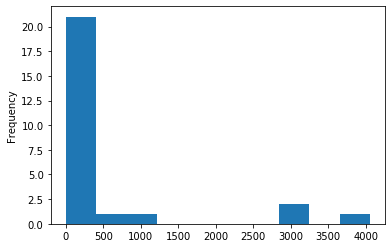

In [15]:
data["Average_Cost"].value_counts().plot(kind='hist')

In [35]:
def remove_commas(x):
    x.replace(",","")
    return x

In [36]:
def remove_symbol(x):
    x.replace("₹","")
    return x

# Replacing commas and rupees symbol

In [16]:
data["Average_Cost"]=data["Average_Cost"].apply(lambda x:x.replace(",",""))

In [17]:
data["Average_Cost"]=data["Average_Cost"].apply(lambda x:x.replace("₹",""))

In [18]:
data[data["Average_Cost"]=='for']

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
6297,for,Fast Food,30 minutes,Pune University,₹50,NEW,ID_6472,-,-


# Removing the 'for' value in Average Cost

In [19]:
data.drop(index=6297,inplace=True)

In [20]:
data["Average_Cost"]=data["Average_Cost"].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13867 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13867 non-null int32
Cuisines         13867 non-null object
Delivery_Time    11093 non-null object
Location         13867 non-null object
Minimum_Order    13867 non-null object
Rating           13867 non-null object
Restaurant       13867 non-null object
Reviews          13867 non-null object
Votes            13867 non-null object
dtypes: int32(1), object(8)
memory usage: 1.0+ MB


# Cuisines

In [22]:
data["Cuisines"].value_counts()

North Indian                             1076
North Indian, Chinese                     786
Fast Food                                 552
South Indian                              336
Chinese                                   303
                                         ... 
Kerala, Chinese, South Indian               1
North Indian, Mughlai, Chinese, Rolls       1
Fast Food, Biryani, North Indian            1
North Indian, Italian, Fast Food            1
Biryani, Kebab, Healthy Food                1
Name: Cuisines, Length: 2392, dtype: int64

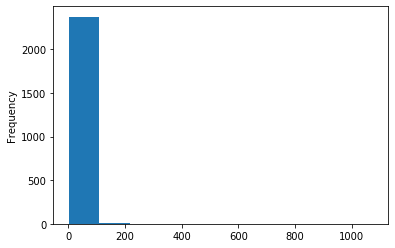

In [23]:
data["Cuisines"].value_counts().plot(kind='hist')

# Converting cuisines to the number of cuisines

In [24]:
data['Cuisines']=data['Cuisines'].apply(lambda x:len(x.split(","))).astype(int)

In [25]:
data["Cuisines"].value_counts()

2    4907
1    3784
3    3066
4    1316
5     498
6     156
7      85
8      55
Name: Cuisines, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13867 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13867 non-null int32
Cuisines         13867 non-null int32
Delivery_Time    11093 non-null object
Location         13867 non-null object
Minimum_Order    13867 non-null object
Rating           13867 non-null object
Restaurant       13867 non-null object
Reviews          13867 non-null object
Votes            13867 non-null object
dtypes: int32(2), object(7)
memory usage: 975.0+ KB


In [27]:
data.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,200,5,30 minutes,"FTI College, Law College Road, Pune",₹50,3.5,ID_6321,4,12
1,100,2,30 minutes,"Sector 3, Marathalli",₹50,3.5,ID_2882,4,11
2,150,3,65 minutes,Mumbai Central,₹50,3.6,ID_1595,30,99
3,250,3,30 minutes,"Sector 1, Noida",₹99,3.7,ID_5929,95,176
4,200,2,65 minutes,"Rmz Centennial, I Gate, Whitefield",₹99,3.2,ID_6123,235,521


# Location

In [28]:
data["Location"].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          1158
D-Block, Sector 63, Noida                           1027
Sector 1, Noida                                      990
FTI College, Law College Road, Pune                  734
Delhi University-GTB Nagar                           699
Sector 14, Noida                                     630
Laxman Vihar Industrial Area, Sector 3A, Gurgoan     611
Delhi Administration Flats, Timarpur                 602
Rmz Centennial, I Gate, Whitefield                   585
Mumbai Central                                       578
MG Road, Pune                                        509
Delhi High Court, India Gate                         504
Nathan Road, Mangaldas Road, Pune                    476
Sandhurst Road, Mumbai CST Area                      463
Sector 3, Marathalli                                 444
Majestic                                             411
Delhi Cantt.                                         397
Yerawada, Pune, Maharashtra    

In [29]:
len(data["Average_Cost"].value_counts())

25

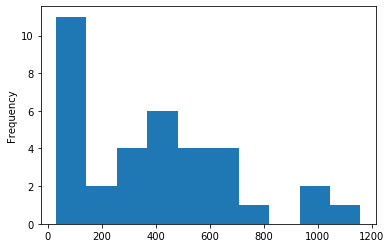

In [30]:
data["Location"].value_counts().plot(kind='hist')

# Minimum Order

In [31]:
data["Minimum_Order"].value_counts()

₹50     12673
₹99       956
₹0        188
₹199       13
₹200       10
₹299        3
₹350        3
₹59         3
₹300        2
₹89         2
₹79         2
₹90         2
₹500        2
₹450        2
₹400        1
₹399        1
₹149        1
₹250        1
₹150        1
₹240        1
Name: Minimum_Order, dtype: int64

In [32]:
data["Minimum_Order"]=data["Minimum_Order"].apply(lambda x:x.replace("₹","")).astype(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13867 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13867 non-null int32
Cuisines         13867 non-null int32
Delivery_Time    11093 non-null object
Location         13867 non-null object
Minimum_Order    13867 non-null int32
Rating           13867 non-null object
Restaurant       13867 non-null object
Reviews          13867 non-null object
Votes            13867 non-null object
dtypes: int32(3), object(6)
memory usage: 920.9+ KB


# Rating

In [34]:
data["Rating"].value_counts()

-                     1496
3.7                   1081
3.6                   1069
3.5                   1015
3.8                    983
3.9                    965
NEW                    957
3.4                    903
3.3                    828
4.0                    755
3.2                    640
4.1                    574
3.1                    531
3.0                    367
4.2                    342
4.3                    299
2.9                    256
2.8                    198
4.4                    171
2.7                     98
4.5                     96
2.6                     51
4.6                     48
4.7                     42
2.5                     33
2.4                     18
4.8                     16
Opening Soon            14
2.3                      8
4.9                      8
2.1                      2
Temporarily Closed       2
2.2                      1
Name: Rating, dtype: int64

In [35]:
data["Rating"]=data["Rating"].replace({'-':0.0,'NEW':0.0,'Opening Soon':0.0,'Temporarily Closed':0.0})

In [36]:
data["Rating"]=data["Rating"].astype(float)

In [37]:
data["Rating"]=data["Rating"].replace({0.0:np.nan})

## replacing the null values in rating with the mean value because if we replace the null values with 0 the data will be biased towards 0

In [38]:
data["Rating"].fillna(round((data["Rating"].mean()),1),inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13867 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13867 non-null int32
Cuisines         13867 non-null int32
Delivery_Time    11093 non-null object
Location         13867 non-null object
Minimum_Order    13867 non-null int32
Rating           13867 non-null float64
Restaurant       13867 non-null object
Reviews          13867 non-null object
Votes            13867 non-null object
dtypes: float64(1), int32(3), object(5)
memory usage: 920.9+ KB


# Restaurant

In [40]:
data["Restaurant"].value_counts()

ID_5538    26
ID_7184    25
ID_2483    24
ID_7295    23
ID_1209    23
           ..
ID_5294     1
ID_7715     1
ID_3090     1
ID_1736     1
ID_7336     1
Name: Restaurant, Length: 8661, dtype: int64

# Reviews

In [41]:
data["Reviews"].value_counts()

-       2904
2        551
1        483
3        466
4        428
        ... 
1890       1
1520       1
603        1
540        1
2303       1
Name: Reviews, Length: 811, dtype: int64

In [42]:
data["Reviews"]=data["Reviews"].replace({'-':0})

In [43]:
data["Reviews"]=data["Reviews"].astype(int)

In [44]:
data["Reviews"]=data["Reviews"].replace({0:np.nan})

## replacing the null values in reviews with the mean value because if we replace the null values with 0 the data will be biased towards 0

In [45]:
data["Reviews"].fillna(int(data["Reviews"].mean()),inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13867 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13867 non-null int32
Cuisines         13867 non-null int32
Delivery_Time    11093 non-null object
Location         13867 non-null object
Minimum_Order    13867 non-null int32
Rating           13867 non-null float64
Restaurant       13867 non-null object
Reviews          13867 non-null float64
Votes            13867 non-null object
dtypes: float64(2), int32(3), object(4)
memory usage: 920.9+ KB


In [47]:
data["Votes"].value_counts()

-       2615
4        298
6        255
7        242
9        238
        ... 
1801       1
1053       1
4883       1
7062       1
1159       1
Name: Votes, Length: 1181, dtype: int64

In [48]:
data["Votes"]=data["Votes"].replace({'-':0})

In [49]:
data["Votes"]=data["Votes"].astype(int)

## replacing the null values in votes with the mean value because if we replace the null values with 0 the data will be biased towards 0.

In [50]:
data["Votes"]=data["Votes"].replace({0:np.nan})

In [51]:
data["Votes"].fillna(int(data["Votes"].mean()),inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13867 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13867 non-null int32
Cuisines         13867 non-null int32
Delivery_Time    11093 non-null object
Location         13867 non-null object
Minimum_Order    13867 non-null int32
Rating           13867 non-null float64
Restaurant       13867 non-null object
Reviews          13867 non-null float64
Votes            13867 non-null float64
dtypes: float64(3), int32(3), object(3)
memory usage: 920.9+ KB


# Delivery Time

In [53]:
data["Delivery_Time"].value_counts()

30 minutes     7405
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

# PreProcessing

## label encoding the delivery time

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
label=LabelEncoder()

In [56]:
data["Delivery_Time_Encoded"]=label.fit_transform(data["Delivery_Time"].astype(str))

In [57]:
data["Delivery_Time"]=data["Delivery_Time_Encoded"]

In [58]:
del(data["Delivery_Time_Encoded"])

## Data visualization

In [59]:
data.corr()

,Average_Cost,Cuisines,Delivery_Time,Minimum_Order,Rating,Reviews,Votes
Average_Cost,1.000000,0.386355,0.052612,0.118514,0.342759,0.442033,0.428197
Cuisines,0.386355,1.000000,0.041714,0.050132,0.216991,0.241169,0.247811
Delivery_Time,0.052612,0.041714,1.000000,0.061798,0.045520,0.053412,0.065535
Minimum_Order,0.118514,0.050132,0.061798,1.000000,0.061335,0.116939,0.119984
Rating,0.342759,0.216991,0.045520,0.061335,1.000000,0.422392,0.444313
Reviews,0.442033,0.241169,0.053412,0.116939,0.422392,1.000000,0.961863
Votes,0.428197,0.247811,0.065535,0.119984,0.444313,0.961863,1.000000


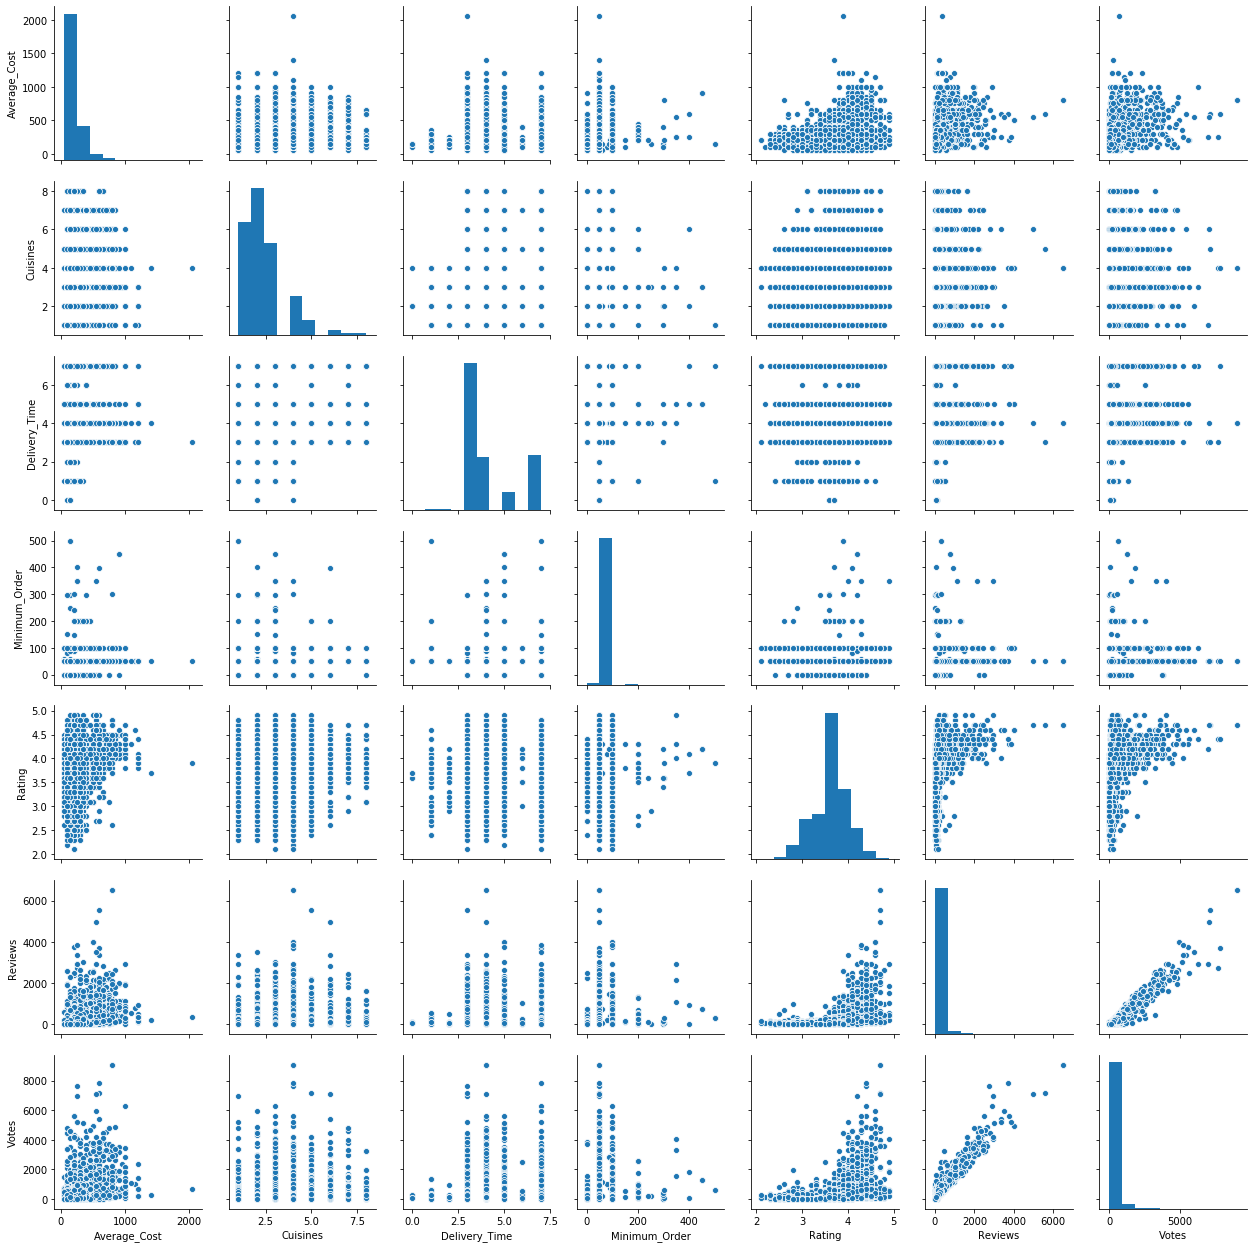

In [60]:
sns.pairplot(data)

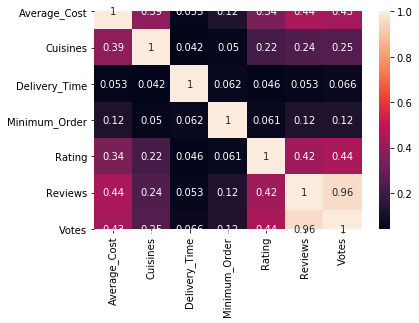

In [61]:
sns.heatmap(data.corr(),annot=True)

# One hot encode the Location Values

In [47]:
data.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,200,5,3,"FTI College, Law College Road, Pune",50,3.5,ID_6321,4.0,12.0
1,100,2,3,"Sector 3, Marathalli",50,3.5,ID_2882,4.0,11.0
2,150,3,5,Mumbai Central,50,3.6,ID_1595,30.0,99.0
3,250,3,3,"Sector 1, Noida",99,3.7,ID_5929,95.0,176.0
4,200,2,5,"Rmz Centennial, I Gate, Whitefield",99,3.2,ID_6123,235.0,521.0


In [49]:
cat_col=data.select_dtypes(exclude=np.number)

In [50]:
num_col=data.select_dtypes(include=np.number)

In [52]:
cat_col=cat_col.drop(columns={'Restaurant'})

In [56]:
cat_col_processed=pd.get_dummies(cat_col)

In [59]:
df=pd.concat([cat_col_processed,num_col],axis='columns')

# Dropping the Location columns since it has much unique addresses

In [ ]:
data.drop(columns={"Location"},inplace=True)

# Splitting the train and test data

In [73]:
train_df=data[data["Delivery_Time"]!=7]

In [74]:
test_df=data[data["Delivery_Time"]==7]

## Removing delivery time from test data

In [75]:
del(test_df["Delivery_Time"])

## X and Y for the model

In [76]:
data.columns

Index(['Average_Cost', 'Cuisines', 'Delivery_Time', 'Minimum_Order', 'Rating',
       'Restaurant', 'Reviews', 'Votes'],
      dtype='object')

In [77]:
X=train_df.drop(columns={"Delivery_Time","Restaurant"})

In [78]:
y=train_df["Delivery_Time"]

In [79]:
X.head()

,Average_Cost,Cuisines,Minimum_Order,Rating,Reviews,Votes
0,200,5,50,3.5,4.0,12.0
1,100,2,50,3.5,4.0,11.0
2,150,3,50,3.6,30.0,99.0
3,250,3,99,3.7,95.0,176.0
4,200,2,99,3.2,235.0,521.0


# Train Test Split

In [80]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=99)

In [81]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((7765, 6), (3328, 6), (7765,), (3328,))

# Model Building

## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [83]:
log=LogisticRegression()

In [84]:
log.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
train_pred_log=log.predict(train_X)

In [92]:
test_pred_log=log.predict(test_X)

In [91]:
accuracy_score(train_y,train_pred_log)

0.678686413393432

In [93]:
accuracy_score(test_y,test_pred_log)

0.66796875

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rfc=RandomForestClassifier(max_depth=10,n_estimators=500,min_samples_split=15)

In [96]:
rfc.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
train_pred_rfc=rfc.predict(train_X)

In [98]:
test_pred_rfc=rfc.predict(test_X)

In [99]:
accuracy_score(train_y,train_pred_rfc)

0.7907276239536382

In [100]:
accuracy_score(test_y,test_pred_rfc)

0.7289663461538461

## Grid search

In [101]:
from sklearn.model_selection import GridSearchCV

In [108]:
max_depth=[int(x) for x in np.linspace(10,30,8)]

In [109]:
min_samples_split=[int(x) for x in np.linspace (15,45,10)]

In [111]:
min_samples_leaf=[int(x) for x in np.linspace(0,10,5)]

In [112]:
param_grid={"max_depth":max_depth,
           "min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf}

In [114]:
grid=GridSearchCV(estimator=rfc,param_grid=param_grid,n_jobs=5,verbose=10)

In [115]:
grid.fit(train_X,train_y)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    9.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   10.2s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   12.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   16.0s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.0s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   29.7s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   49.8s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed:  3.1min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  3.8min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed:  4.4min
[Parallel(

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=15,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False,
                                              ran

In [116]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=27, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [289]:
rfc1=RandomForestClassifier(n_estimators=150,max_depth=25)

In [290]:
rfc1.fit(train_X.drop(columns={"Cuisines"}),train_y.drop(columns={"Cuisines"}))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [291]:
train_pred_rfc1=rfc1.predict(train_X.drop(columns={"Cuisines"}))

In [292]:
test_pred_rfc1=rfc1.predict(test_X.drop(columns={"Cuisines"}))

In [293]:
accuracy_score(train_y.drop(columns={"Cuisines"}),train_pred_rfc1)

0.9826142949130715

In [294]:
accuracy_score(test_y.drop(columns={"Cuisines"}),test_pred_rfc1)

0.7626201923076923

In [272]:
test_df.columns

Index(['Average_Cost', 'Cuisines', 'Minimum_Order', 'Rating', 'Restaurant',
       'Reviews', 'Votes'],
      dtype='object')

In [239]:
result_pred_rfc=rfc1.predict(test_df.drop(columns={"Restaurant","Cuisines"}))

In [240]:
result_Dataframe_rfc=pd.DataFrame(label.inverse_transform(result_pred_rfc),columns={"Delivery_Time"})

In [241]:
result_Dataframe_rfc.to_excel("RFCPrediction.xlsx",index=False)

# GradientBoost Classifier

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [273]:
gb=GradientBoostingClassifier( max_depth=25)

In [274]:
gb.fit(train_X.drop(columns={"Reviews"}),train_y.drop(columns={"Reviews"}))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=25,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [275]:
train_pred_gb=gb.predict(train_X.drop(columns={"Reviews"}))

test_pred_gb=gb.predict(test_X.drop(columns={"Reviews"}))



In [276]:
accuracy_score(train_y.drop(columns={"Reviews"}),train_pred_gb)



0.9723116548615582

In [277]:
accuracy_score(test_y.drop(columns={"Reviews"}),test_pred_gb)

0.7346754807692307

# XGBoost

In [132]:
import xgboost as xgb

In [210]:
xgb_model=xgb.XGBClassifier(max_depth=55)

In [216]:
xgb_model.fit(train_X.drop(columns={"Cuisines"}),train_y.drop(columns={"Cuisines"}))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=55,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [217]:
train_pred_xgb=xgb_model.predict(train_X.drop(columns={"Cuisines"}))

In [218]:
test_pred_xgb=xgb_model.predict(test_X.drop(columns={"Cuisines"}))

In [219]:
accuracy_score(train_y.drop(columns={"Cuisines"}),train_pred_xgb)

0.9815840309079201

In [220]:
accuracy_score(test_y.drop(columns={"Cuisines"}),test_pred_xgb)

0.7584134615384616

In [159]:
confusion_matrix(train_y,train_pred_xgb)

array([[   0,    0,    0,    1,    0,    0,    0],
       [   0,   37,    0,    3,    1,    0,    0],
       [   0,    0,   13,    1,    0,    0,    0],
       [   0,    0,    0, 5215,    6,    0,    0],
       [   0,    0,    0,   68, 1795,    0,    0],
       [   0,    0,    0,   16,    2,  599,    0],
       [   0,    0,    0,    0,    0,    0,    8]], dtype=int64)

In [160]:
result_pred_xgb=xgb_model.predict(test_df.drop(columns={"Restaurant"}))

In [157]:
result_Dataframe_xgb=pd.DataFrame(label.inverse_transform(result_pred_xgb),columns={"Delivery_Time"})

In [158]:
result_Dataframe_xgb.to_excel("XGBoostPrediction.xlsx",index=False)

# CatBoost

In [142]:
pip install catboost --no-cache-dir

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=65aab1d9fb96774e955ff9ac135a8dd8e49166e8f6762ec2362b4809dc474ebe
  Stored in directory: C:\Users\Dell\AppData\Local\Temp\pip-ephem-wheel-cache-4i45faoc\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [143]:
from catboost import CatBoostClassifier

In [144]:
cat=CatBoostClassifier()

In [278]:
cat.fit(train_X.drop(columns={"Cuisines"}),train_y.drop(columns={"Cuisines"}))

0:	learn: 1.8530237	total: 45.4ms	remaining: 45.4s
1:	learn: 1.7743778	total: 82.5ms	remaining: 41.1s
2:	learn: 1.7073020	total: 121ms	remaining: 40.2s
3:	learn: 1.6449900	total: 154ms	remaining: 38.3s
4:	learn: 1.5911628	total: 177ms	remaining: 35.3s
5:	learn: 1.5405623	total: 197ms	remaining: 32.7s
6:	learn: 1.4941261	total: 223ms	remaining: 31.7s
7:	learn: 1.4523360	total: 243ms	remaining: 30.1s
8:	learn: 1.4151103	total: 274ms	remaining: 30.2s
9:	learn: 1.3795741	total: 310ms	remaining: 30.7s
10:	learn: 1.3466447	total: 401ms	remaining: 36.1s
11:	learn: 1.3158621	total: 442ms	remaining: 36.4s
12:	learn: 1.2875479	total: 495ms	remaining: 37.6s
13:	learn: 1.2607491	total: 638ms	remaining: 44.9s
14:	learn: 1.2355827	total: 677ms	remaining: 44.4s
15:	learn: 1.2125143	total: 769ms	remaining: 47.3s
16:	learn: 1.1902857	total: 913ms	remaining: 52.8s
17:	learn: 1.1692638	total: 1.03s	remaining: 56s
18:	learn: 1.1492049	total: 1.1s	remaining: 56.8s
19:	learn: 1.1308836	total: 1.16s	remainin

164:	learn: 0.6719584	total: 10.1s	remaining: 51.2s
165:	learn: 0.6716524	total: 10.2s	remaining: 51.3s
166:	learn: 0.6714186	total: 10.3s	remaining: 51.2s
167:	learn: 0.6712047	total: 10.3s	remaining: 51.1s
168:	learn: 0.6710002	total: 10.4s	remaining: 51s
169:	learn: 0.6708164	total: 10.4s	remaining: 50.7s
170:	learn: 0.6705373	total: 10.4s	remaining: 50.4s
171:	learn: 0.6702490	total: 10.4s	remaining: 50.2s
172:	learn: 0.6698466	total: 10.4s	remaining: 49.9s
173:	learn: 0.6696330	total: 10.5s	remaining: 49.8s
174:	learn: 0.6693583	total: 10.5s	remaining: 49.7s
175:	learn: 0.6691381	total: 10.6s	remaining: 49.5s
176:	learn: 0.6689409	total: 10.6s	remaining: 49.3s
177:	learn: 0.6685294	total: 10.6s	remaining: 49.1s
178:	learn: 0.6682036	total: 10.6s	remaining: 48.8s
179:	learn: 0.6678960	total: 10.7s	remaining: 49s
180:	learn: 0.6676704	total: 10.8s	remaining: 48.7s
181:	learn: 0.6674872	total: 10.8s	remaining: 48.5s
182:	learn: 0.6671030	total: 10.8s	remaining: 48.3s
183:	learn: 0.66

323:	learn: 0.6435657	total: 16.5s	remaining: 34.5s
324:	learn: 0.6434892	total: 16.5s	remaining: 34.4s
325:	learn: 0.6434000	total: 16.6s	remaining: 34.3s
326:	learn: 0.6431275	total: 16.6s	remaining: 34.3s
327:	learn: 0.6429976	total: 16.7s	remaining: 34.2s
328:	learn: 0.6429217	total: 16.7s	remaining: 34s
329:	learn: 0.6428348	total: 16.8s	remaining: 34.1s
330:	learn: 0.6425802	total: 16.8s	remaining: 34s
331:	learn: 0.6424714	total: 16.9s	remaining: 33.9s
332:	learn: 0.6423374	total: 16.9s	remaining: 33.8s
333:	learn: 0.6422635	total: 17s	remaining: 33.8s
334:	learn: 0.6420589	total: 17s	remaining: 33.7s
335:	learn: 0.6419954	total: 17s	remaining: 33.6s
336:	learn: 0.6419139	total: 17s	remaining: 33.5s
337:	learn: 0.6418191	total: 17.1s	remaining: 33.4s
338:	learn: 0.6416827	total: 17.1s	remaining: 33.4s
339:	learn: 0.6415072	total: 17.2s	remaining: 33.3s
340:	learn: 0.6414219	total: 17.2s	remaining: 33.2s
341:	learn: 0.6413223	total: 17.2s	remaining: 33.1s
342:	learn: 0.6411345	to

483:	learn: 0.6217825	total: 25.6s	remaining: 27.3s
484:	learn: 0.6216893	total: 25.6s	remaining: 27.2s
485:	learn: 0.6215072	total: 25.7s	remaining: 27.1s
486:	learn: 0.6212967	total: 25.7s	remaining: 27.1s
487:	learn: 0.6211476	total: 25.8s	remaining: 27s
488:	learn: 0.6210375	total: 25.8s	remaining: 27s
489:	learn: 0.6208592	total: 25.8s	remaining: 26.9s
490:	learn: 0.6206050	total: 25.9s	remaining: 26.8s
491:	learn: 0.6205498	total: 25.9s	remaining: 26.7s
492:	learn: 0.6204444	total: 26s	remaining: 26.7s
493:	learn: 0.6203638	total: 26s	remaining: 26.6s
494:	learn: 0.6202891	total: 26s	remaining: 26.6s
495:	learn: 0.6202072	total: 26.1s	remaining: 26.5s
496:	learn: 0.6200822	total: 26.1s	remaining: 26.4s
497:	learn: 0.6199533	total: 26.2s	remaining: 26.4s
498:	learn: 0.6198607	total: 26.2s	remaining: 26.3s
499:	learn: 0.6197404	total: 26.2s	remaining: 26.2s
500:	learn: 0.6195877	total: 26.3s	remaining: 26.2s
501:	learn: 0.6194424	total: 26.4s	remaining: 26.1s
502:	learn: 0.6193173	

643:	learn: 0.6033178	total: 32.4s	remaining: 17.9s
644:	learn: 0.6031426	total: 32.5s	remaining: 17.9s
645:	learn: 0.6029551	total: 32.5s	remaining: 17.8s
646:	learn: 0.6028283	total: 32.5s	remaining: 17.7s
647:	learn: 0.6027342	total: 32.5s	remaining: 17.7s
648:	learn: 0.6026910	total: 32.5s	remaining: 17.6s
649:	learn: 0.6025239	total: 32.6s	remaining: 17.5s
650:	learn: 0.6024773	total: 32.6s	remaining: 17.5s
651:	learn: 0.6024225	total: 32.6s	remaining: 17.4s
652:	learn: 0.6022602	total: 32.7s	remaining: 17.4s
653:	learn: 0.6021924	total: 32.7s	remaining: 17.3s
654:	learn: 0.6021499	total: 32.8s	remaining: 17.3s
655:	learn: 0.6020570	total: 32.8s	remaining: 17.2s
656:	learn: 0.6019415	total: 32.8s	remaining: 17.1s
657:	learn: 0.6018442	total: 32.8s	remaining: 17.1s
658:	learn: 0.6016444	total: 32.9s	remaining: 17s
659:	learn: 0.6016047	total: 32.9s	remaining: 17s
660:	learn: 0.6015406	total: 33s	remaining: 16.9s
661:	learn: 0.6014677	total: 33s	remaining: 16.8s
662:	learn: 0.601263

803:	learn: 0.5878832	total: 39.8s	remaining: 9.71s
804:	learn: 0.5876868	total: 40s	remaining: 9.68s
805:	learn: 0.5876425	total: 40s	remaining: 9.62s
806:	learn: 0.5876094	total: 40s	remaining: 9.57s
807:	learn: 0.5875347	total: 40s	remaining: 9.51s
808:	learn: 0.5874327	total: 40.1s	remaining: 9.46s
809:	learn: 0.5873782	total: 40.1s	remaining: 9.42s
810:	learn: 0.5872318	total: 40.2s	remaining: 9.36s
811:	learn: 0.5871275	total: 40.2s	remaining: 9.3s
812:	learn: 0.5869895	total: 40.2s	remaining: 9.25s
813:	learn: 0.5869021	total: 40.2s	remaining: 9.19s
814:	learn: 0.5867438	total: 40.3s	remaining: 9.14s
815:	learn: 0.5866617	total: 40.3s	remaining: 9.1s
816:	learn: 0.5865404	total: 40.4s	remaining: 9.04s
817:	learn: 0.5864689	total: 40.4s	remaining: 8.99s
818:	learn: 0.5863455	total: 40.4s	remaining: 8.93s
819:	learn: 0.5862621	total: 40.4s	remaining: 8.87s
820:	learn: 0.5861692	total: 40.5s	remaining: 8.82s
821:	learn: 0.5860431	total: 40.5s	remaining: 8.78s
822:	learn: 0.5859714	

963:	learn: 0.5730062	total: 46s	remaining: 1.72s
964:	learn: 0.5729279	total: 46s	remaining: 1.67s
965:	learn: 0.5728836	total: 46.1s	remaining: 1.62s
966:	learn: 0.5728038	total: 46.1s	remaining: 1.57s
967:	learn: 0.5727171	total: 46.1s	remaining: 1.52s
968:	learn: 0.5726375	total: 46.2s	remaining: 1.48s
969:	learn: 0.5725779	total: 46.3s	remaining: 1.43s
970:	learn: 0.5725421	total: 46.3s	remaining: 1.38s
971:	learn: 0.5724971	total: 46.3s	remaining: 1.33s
972:	learn: 0.5724761	total: 46.4s	remaining: 1.29s
973:	learn: 0.5723195	total: 46.5s	remaining: 1.24s
974:	learn: 0.5722887	total: 46.5s	remaining: 1.19s
975:	learn: 0.5721909	total: 46.5s	remaining: 1.14s
976:	learn: 0.5721595	total: 46.5s	remaining: 1.09s
977:	learn: 0.5721275	total: 46.6s	remaining: 1.05s
978:	learn: 0.5720489	total: 46.6s	remaining: 999ms
979:	learn: 0.5719804	total: 46.6s	remaining: 951ms
980:	learn: 0.5718955	total: 46.6s	remaining: 903ms
981:	learn: 0.5717905	total: 46.8s	remaining: 857ms
982:	learn: 0.57

In [279]:
train_pred_cat=cat.predict(train_X.drop(columns={"Cuisines"}))

In [280]:
test_pred_cat=cat.predict(test_X.drop(columns={"Cuisines"}))

In [281]:
accuracy_score(train_y.drop(columns={"Cuisines"}),train_pred_cat)

0.7835157759175789

In [282]:
accuracy_score(test_y.drop(columns={"Cuisines"}),test_pred_cat)

0.7211538461538461